<a href="https://colab.research.google.com/github/yungch1ko/Exercise1/blob/master/AIprojectBC1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from pathlib import Path
import pandas as pd
current_path = Path(os.path.dirname(os.path.abspath("__file__")))

file_name="Breast_Cancer.csv"
data=pd.read_csv(os.path.join(current_path,file_name))

data.head(3)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive


In [2]:
data.isna().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [4]:
y=data["Status"]
X=data.drop(columns=["Status"])

y=y.reset_index(drop=True)
X=X.reset_index(drop=True)

In [7]:
y

0       Alive
1       Alive
2       Alive
3       Alive
4       Alive
        ...  
4019    Alive
4020    Alive
4021    Alive
4022    Alive
4023    Alive
Name: Status, Length: 4024, dtype: object

In [8]:
X.head(3)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75


In [10]:
X=pd.get_dummies(data=X, drop_first=True)
X.head(3)

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Race_Other,Race_White,Marital Status_Married,Marital Status_Separated,Marital Status_Single,...,6th Stage_IIIC,differentiate_Poorly differentiated,differentiate_Undifferentiated,differentiate_Well differentiated,Grade_1,Grade_2,Grade_3,A Stage_Regional,Estrogen Status_Positive,Progesterone Status_Positive
0,68,4,24,1,60,False,True,True,False,False,...,False,True,False,False,False,False,True,True,True,True
1,50,35,14,5,62,False,True,True,False,False,...,False,False,False,False,False,True,False,True,True,True
2,58,63,14,7,75,False,True,False,False,False,...,True,False,False,False,False,True,False,True,True,True


In [11]:
X.to_csv("X.csv", index=False)
y.to_csv("y.csv", index=False)

In [12]:
y.value_counts()

Status
Alive    3408
Dead      616
Name: count, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
#adding the stratify=y parameter causes the percentage of each class to be the same in the test set and in the training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

print("Size of X_train", X_train.shape)
print("Size of X_test", X_test.shape)
print("Size of y_train", y_train.shape)
print("Size of y_test", y_test.shape)

Size of X_train (3219, 29)
Size of X_test (805, 29)
Size of y_train (3219,)
Size of y_test (805,)


[Text(0.5, 0.875, 'Survival Months <= 47.5\ngini = 0.259\nsamples = 3219\nvalue = [2726, 493]\nclass = No'),
 Text(0.25, 0.625, 'Progesterone Status_Positive <= 0.5\ngini = 0.395\nsamples = 376\nvalue = [102, 274]\nclass = Yes'),
 Text(0.125, 0.375, 'Race_Other <= 0.5\ngini = 0.152\nsamples = 133\nvalue = [11, 122]\nclass = Yes'),
 Text(0.0625, 0.125, 'gini = 0.131\nsamples = 128\nvalue = [9, 119]\nclass = Yes'),
 Text(0.1875, 0.125, 'gini = 0.48\nsamples = 5\nvalue = [2, 3]\nclass = Yes'),
 Text(0.375, 0.375, 'Age <= 57.5\ngini = 0.468\nsamples = 243\nvalue = [91, 152]\nclass = Yes'),
 Text(0.3125, 0.125, 'gini = 0.499\nsamples = 143\nvalue = [74, 69]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.282\nsamples = 100\nvalue = [17, 83]\nclass = Yes'),
 Text(0.75, 0.625, 'Reginol Node Positive <= 10.5\ngini = 0.142\nsamples = 2843\nvalue = [2624, 219]\nclass = No'),
 Text(0.625, 0.375, 'Survival Months <= 60.5\ngini = 0.12\nsamples = 2600\nvalue = [2434, 166]\nclass = No'),
 Text(0.5625, 

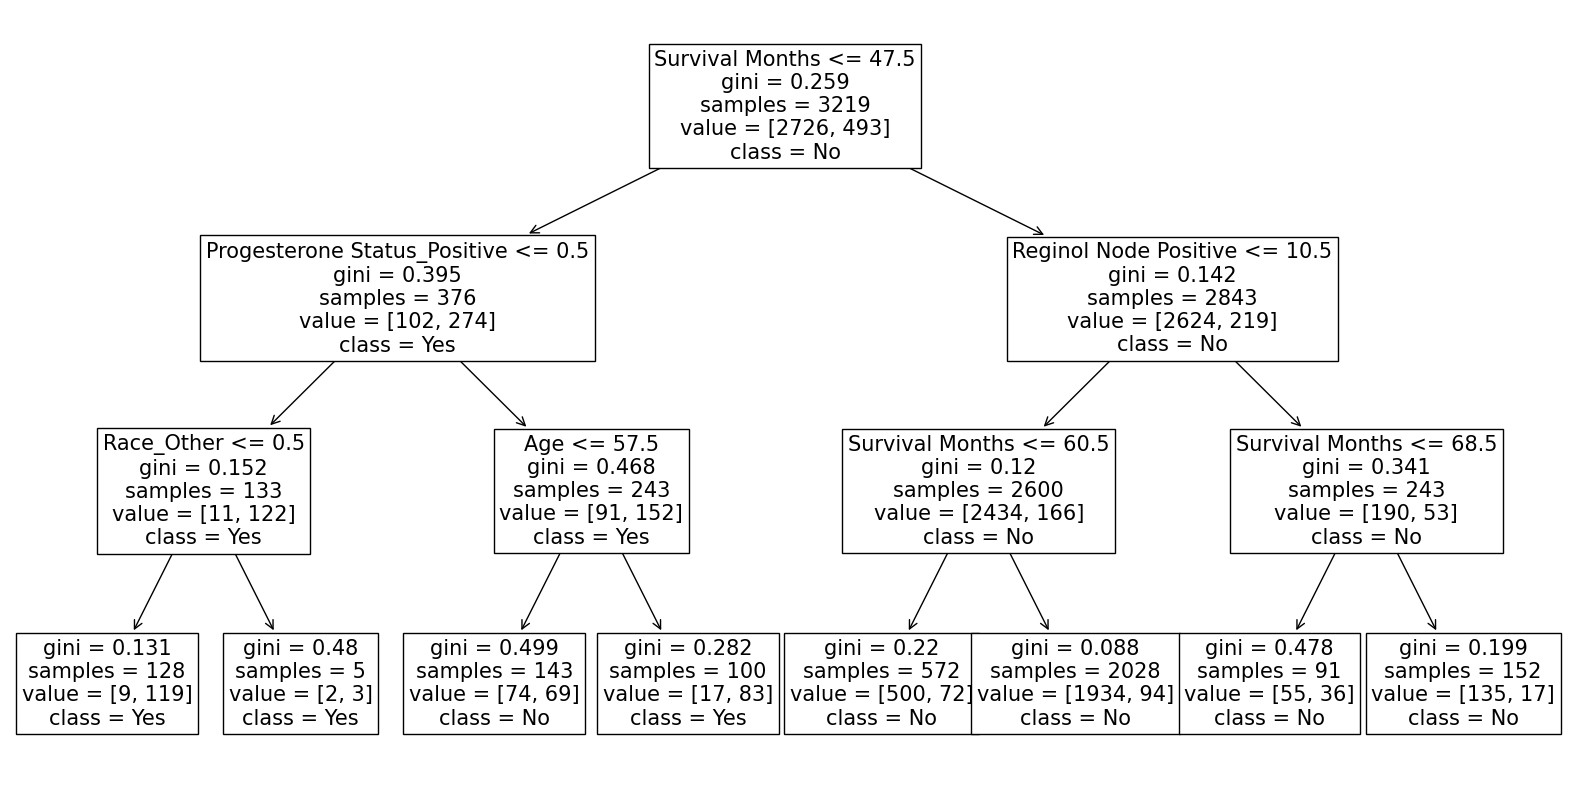

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt


#model creation and training
class_dt = DecisionTreeClassifier(max_depth=3)
class_dt.fit(X_train, y_train)

#visualization of decisions made
plt.figure(figsize=(20,10))
tree.plot_tree(class_dt,feature_names=X.columns, class_names=["No","Yes"], fontsize=15)

In [15]:
y_pred=class_dt.predict(X_test)
probas=class_dt.predict_proba(X_test)

In [16]:
y_pred

array(['Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive',
       'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive',
       'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive',
       'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive',
       'Alive', 'Alive', 'Alive', 'Dead', 'Alive', 'Alive', 'Alive',
       'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive',
       'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive',
       'Alive', 'Dead', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive',
       'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive',
       'Alive', 'Dead', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive',
       'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive',
       'Dead', 'Alive', 'Alive', 'Alive', 'Dead', 'Alive', 'Alive',
       'Dead', 'Alive', 'Alive', 'Dead', 'Alive', 'Alive', 'Alive',
       'Alive', 'Alive', 'Dead', 'Alive', 'Alive', 'Alive', 'Alive',
       'Dead', 'Dead', 'Aliv

In [17]:
probas

array([[0.87412587, 0.12587413],
       [0.95364892, 0.04635108],
       [0.95364892, 0.04635108],
       ...,
       [0.87412587, 0.12587413],
       [0.0703125 , 0.9296875 ],
       [0.95364892, 0.04635108]])

In [18]:
#create a dataframe containing X_test, y_test, y_pred and probas
def create_results_df(X_test, y_test, y_pred, probas):
  results=X_test.copy()
  results["y_test_TI"]=y_test
  results["y_pred_TI"]=y_pred
  results["proba_TI"]=probas[:,1]
  return results

In [19]:
results=create_results_df(X_test, y_test, y_pred, probas)
results.head(10)

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Race_Other,Race_White,Marital Status_Married,Marital Status_Separated,Marital Status_Single,...,differentiate_Well differentiated,Grade_1,Grade_2,Grade_3,A Stage_Regional,Estrogen Status_Positive,Progesterone Status_Positive,y_test_TI,y_pred_TI,proba_TI
3658,56,26,24,5,49,True,False,True,False,False,...,False,False,True,False,True,True,True,Alive,Alive,0.125874
531,62,16,14,1,80,False,True,False,False,True,...,True,True,False,False,True,True,True,Alive,Alive,0.046351
133,50,20,5,1,87,False,True,True,False,False,...,False,False,True,False,True,True,True,Alive,Alive,0.046351
977,51,60,2,1,89,False,True,False,False,True,...,False,False,True,False,True,True,True,Alive,Alive,0.046351
3182,43,20,13,1,82,False,True,True,False,False,...,False,False,True,False,True,True,False,Alive,Alive,0.046351
530,53,8,38,28,10,False,True,True,False,False,...,True,True,False,False,True,True,True,Alive,Alive,0.482517
2688,51,25,16,2,75,False,True,True,False,False,...,False,False,True,False,True,True,True,Alive,Alive,0.046351
1371,49,10,15,1,46,False,True,True,False,False,...,True,True,False,False,True,True,True,Alive,Alive,0.482517
610,52,30,6,1,62,True,False,False,False,True,...,False,False,False,True,True,True,True,Alive,Alive,0.046351
1869,51,10,20,1,72,False,False,True,False,False,...,False,False,True,False,True,True,True,Alive,Alive,0.046351


In [23]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Example true and predicted labels with mixed data types
y_test = np.array([0, 1, 0, '1', 0, 1, 0, 1, 0, 1])
y_pred = np.array([0, 0, 0, 1, '0', 1, 1, 1, 0, 1])

# Convert all elements to integers (if appropriate)
y_test = y_test.astype(int)
y_pred = y_pred.astype(int)

# Ensure y_test and y_pred have the same length
if len(y_test) != len(y_pred):
    raise ValueError("y_test and y_pred must have the same length")

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Print the confusion matrix
print("Confusion matrix")
print(cm)


Confusion matrix
[[4 1]
 [1 4]]


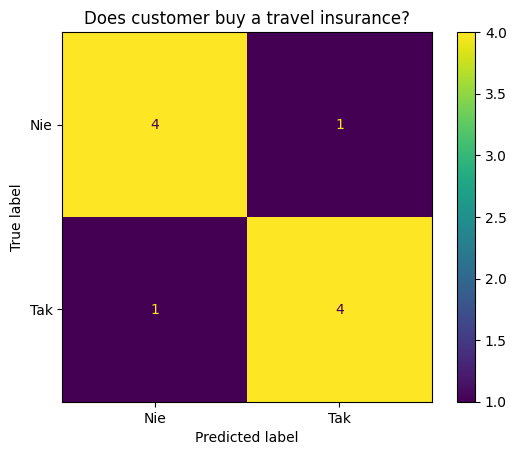

In [24]:
import matplotlib.pyplot as plt
from sklearn import metrics


#graphic visualization of the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Nie", "Tak"])
cm_display.plot()
plt.title("Does customer buy a travel insurance?")
plt.show()

In [25]:
from sklearn.metrics import classification_report

#calculating metrics
print("Metrics")
print(classification_report(y_test, y_pred, target_names=["Nie","Tak"]))

Metrics
              precision    recall  f1-score   support

         Nie       0.80      0.80      0.80         5
         Tak       0.80      0.80      0.80         5

    accuracy                           0.80        10
   macro avg       0.80      0.80      0.80        10
weighted avg       0.80      0.80      0.80        10



In [27]:
from sklearn.preprocessing import StandardScaler

#Preparing training data for the model for the SVM classifier
#data rescaling
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)

X_test=scaler.transform(X_test)

In [28]:
def train_and_test(classifier, X_train, y_train, X_test, y_test, column_names=None):
  #creating a classifier and training
  classifier.fit(X_train, y_train)

  #prediction
  y_pred=classifier.predict(X_test)
  probas=classifier.predict_proba(X_test)

  #create a dataframe containing X_test, y_test, y_pred and probas
  if column_names is not None:
    X_test_df = pd.DataFrame(X_test, columns=column_names)
    results=create_results_df(X_test_df, y_test, y_pred, probas)
  else:
    results=create_results_df(X_test, y_test, y_pred, probas)

  #calculating confusion matrix
  print("Confusion matrix")
  print(confusion_matrix(y_test, y_pred, labels=[0,1]))

  #calculating metrics
  print("Metrics")
  print(classification_report(y_test, y_pred, target_names=["Nie","Tak"]))
  return results

In [30]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import pandas as pd

# Example `train_and_test` function definition
def train_and_test(classifier, X_train, y_train, X_test, y_test, feature_names):
    # Train the classifier
    classifier.fit(X_train, y_train)

    # Predict on the test set
    y_pred = classifier.predict(X_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Return results as a dictionary
    return {
        "confusion_matrix": cm,
        "accuracy": accuracy,
        "predictions": y_pred,
        "classifier": classifier
    }

# Example data (replace with actual data)
# Ensuring that the lengths of X_train, y_train, X_test, and y_test are correct
X_train = pd.DataFrame(np.random.randn(100, 5), columns=[f"feature_{i}" for i in range(5)])
y_train = np.random.randint(0, 2, 100)
X_test = pd.DataFrame(np.random.randn(50, 5), columns=[f"feature_{i}" for i in range(5)])
y_test = np.random.randint(0, 2, 50)

# Define the classifier
classifier = SVC(probability=True)

# Train and test the classifier
results = train_and_test(classifier, X_train, y_train, X_test, y_test, X_train.columns)

# Print the results
print("Confusion matrix")
print(results["confusion_matrix"])
print("Accuracy:", results["accuracy"])


Confusion matrix
[[ 7 16]
 [ 5 22]]
Accuracy: 0.58


In [31]:
import pickle
path_to_save="model_SVM.pickle"

with open(os.path.join(current_path,path_to_save), 'wb') as model_file:
  pickle.dump(classifier, model_file)

In [32]:
model_path="model_SVM.pickle"
with open(os.path.join(current_path,model_path), 'rb') as model_file:
    model = pickle.load(model_file)
  #variable model contains the SVM classifier object

In [33]:
#prediction
y_pred=model.predict(X_test)

print("Confusion matrix")
print(confusion_matrix(y_test, y_pred, labels=[0,1]))

Confusion matrix
[[ 7 16]
 [ 5 22]]


In [34]:
y.value_counts()

Status
Alive    3408
Dead      616
Name: count, dtype: int64

In [36]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Example data (replace this with your actual dataset)
np.random.seed(0)
X = pd.DataFrame(np.random.randn(1000, 5), columns=[f"feature_{i}" for i in range(5)])
y = np.random.randint(0, 2, 1000)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Training the Random Forest Classifier
class_rf = RandomForestClassifier(class_weight="balanced")
class_rf.fit(X_train, y_train)

# Making predictions
y_pred = class_rf.predict(X_test)

# Ensure y_test and y_pred are integers
y_test = y_test.astype(int)
y_pred = y_pred.astype(int)

# Calculating confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
print("Confusion matrix")
print(cm)

# Calculating metrics
print("Metrics")
print(classification_report(y_test, y_pred, target_names=["Nie", "Tak"]))


Confusion matrix
[[57 44]
 [46 53]]
Metrics
              precision    recall  f1-score   support

         Nie       0.55      0.56      0.56       101
         Tak       0.55      0.54      0.54        99

    accuracy                           0.55       200
   macro avg       0.55      0.55      0.55       200
weighted avg       0.55      0.55      0.55       200



In [37]:
import numpy as np
importances = class_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in class_rf.estimators_], axis=0)

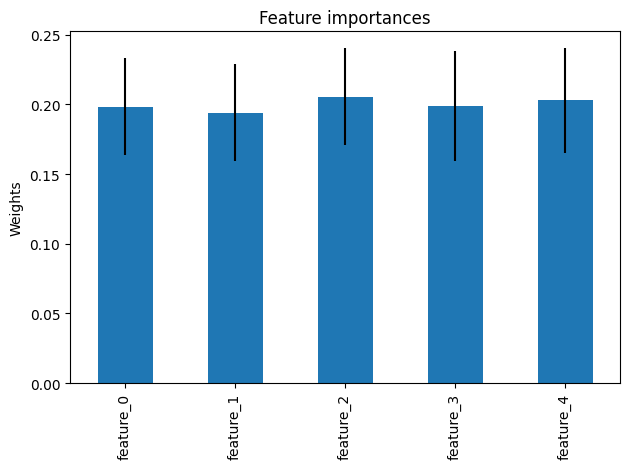

In [38]:
import pandas as pd

feature_names = list(X.columns)
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Weights")
fig.tight_layout()

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scal=scaler.fit_transform(X)

In [40]:
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd

tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(X_scal)

df_subset=pd.DataFrame()
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]

<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

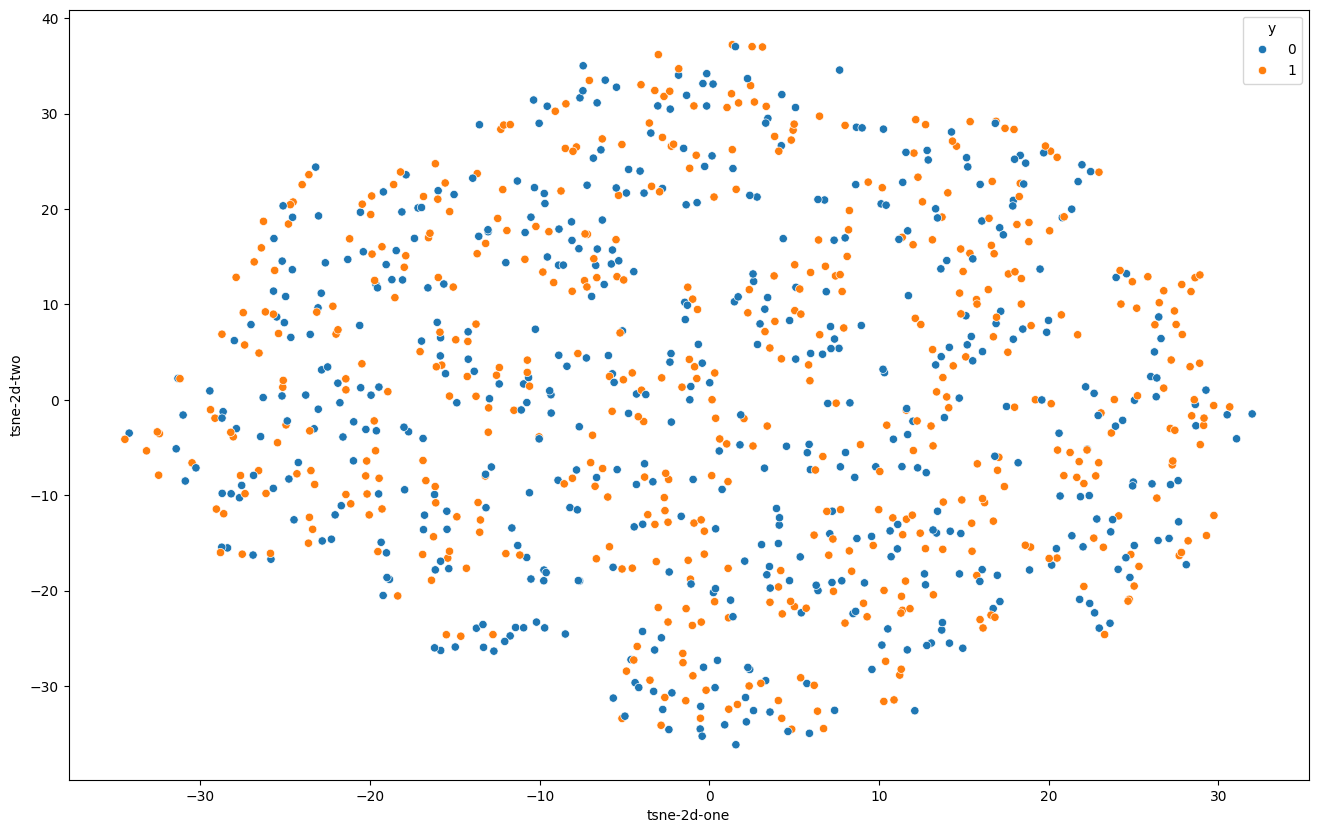

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

df_subset["y"]=y
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    data=df_subset,
    legend="full"
)